# Análisis Introductorio de Datos: Búsqueda de patrones en Accidentes
Objetivos:
* Establecer los patrones generales en accidentes de tránsito en la ciudad de Barranquilla desde 2015 hasta 2018.

## Lectura de Datos para Análisis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

accidentes_df = pd.read_csv('../../data/processed/Accidentes_clean.csv')
accidentes_df['FECHA_ACCIDENTE'] = pd.to_datetime(accidentes_df['FECHA_ACCIDENTE'], format="%Y-%m-%d %H:%M:%S")
accidentes_df.head(10)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,MOMENTO_DIA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,LATITUD,LONGITUD,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,ZONA,DIA_SEMANA_ACCIDENTE
0,2017-12-24 21:30:00,2017,12,Dom,09:30:00:PM,Noche,Con heridos,Choque,CR 6 CL 94,10.946586,-74.826513,1.0,0.0,1,SUR,FIN DE SEMANA
1,2015-01-01 14:10:00,2015,1,Jue,02:10:00:PM,Tarde,Con heridos,Choque,VIA 40 CON 77,11.016189,-74.795327,1.0,0.0,1,NORTE,DIA DE SEMANA
2,2015-01-01 14:15:00,2015,1,Jue,02:15:00:PM,Tarde,Solo daños,Choque,CALLE 14 CR 13,10.952965,-74.771882,0.0,0.0,1,CENTRO,DIA DE SEMANA
3,2015-01-01 14:20:00,2015,1,Jue,02:20:00:PM,Tarde,Solo daños,Choque,CL 74 CR 38C,10.985707,-74.812420,0.0,0.0,1,NORTE,DIA DE SEMANA
4,2015-01-01 15:30:00,2015,1,Jue,03:30:00:PM,Tarde,Con heridos,Choque,CL 45 CR 19,10.958396,-74.794710,2.0,0.0,1,CENTRO,DIA DE SEMANA
5,2015-01-01 04:20:00,2015,1,Jue,04:20:00:AM,Madrugada,Solo daños,Choque,CRA 15 CLLE 21,10.953501,-74.776203,0.0,0.0,1,CENTRO,DIA DE SEMANA
6,2015-01-01 16:40:00,2015,1,Jue,04:40:00:PM,Tarde,Con heridos,Choque,CRA 14 CLLE 35,10.951457,-74.788801,2.0,0.0,1,CENTRO,DIA DE SEMANA
7,2015-01-01 16:50:00,2015,1,Jue,04:50:00:PM,Tarde,Con heridos,Atropello,CRA 6 CLLE 90,10.944943,-74.823909,1.0,0.0,1,SUR,DIA DE SEMANA
8,2015-01-01 06:00:00,2015,1,Jue,06:00:00:AM,Mañana,Solo daños,Choque,CRA 6 CLLE 92,10.944446,-74.825528,0.0,0.0,1,SUR,DIA DE SEMANA
9,2015-01-01 19:50:00,2015,1,Jue,07:50:00:PM,Noche,Solo daños,Choque,CALLE 99 CR 56,11.016135,-74.826478,0.0,0.0,1,NORTE,DIA DE SEMANA


## Principales Aspectos a Descrubir
El dataset de accidentes representa una serie de tiempo desde el año 2015 hasta el 2018 con variables exógenas para las cuales conocer su disribución nos brinda información sobre los patrones en los accidentes en general. Para la información disponible se propone descubrir los siguientes patrones:

* Distribución mensual
* Distribución semanal (día de la semana)
* Distribución por momento del día (noche, mañana, tarde, etc.)
* Distribución por zona de la ciudad
* Distribución días de la semana vs fines de semana

Estas distribuciones representan las variables exógenas de las que se puede obtener valor, de ellas se conocen sus valores para distintas clases que son interesantes como patrones útiles para modelar el comportamiento. Por ello, estas distribuciones se presentarán para las siguientes condiciones:

* Totalidad de los accidentes
* Accidentes sólo con heridos
* Accidentes sólo con muertos
* Cada una de las clases de accidente disponible.

### Distribución mensual
Para la **totalidad** de accidentes se tiene la siguiente distribución mensual.

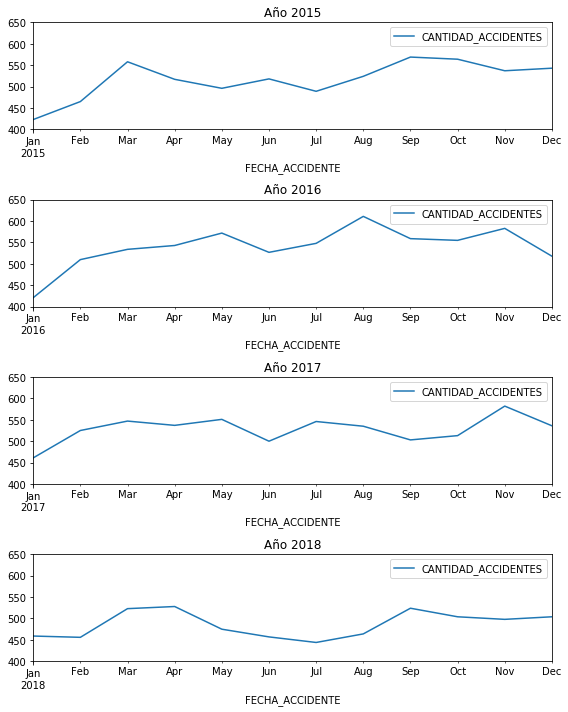

In [2]:
years = accidentes_df['AÑO_ACCIDENTE'].unique()
fig = plt.figure(figsize=(8,10))
for year in years:
    monthly_data = (accidentes_df[accidentes_df['AÑO_ACCIDENTE'] == year]
                    .set_index('FECHA_ACCIDENTE')
                    .groupby(pd.Grouper(freq='m'))
                    .agg({'CANTIDAD_ACCIDENTES':sum}))
    ax = fig.add_subplot(len(years),1,year - min(years)+1)
    monthly_data.plot(ax=ax)
    ax.set(title='Año '+str(year), ylim=((400,650)))
plt.tight_layout()
plt.show()

De la gráfica anterior se pueden observar los siguientes patrones comunes en todos los años:
1. El inicio de año es de lo meses con menor accidentalidad.
2. Entre Febrero y Marzo ocurre un aumento considerable de los accidentes, una hipótesis sería el efecto del inicio de jornadas laborales y escolares junto con el carnaval.
3. Los meses de mitad de año, entre Mayo, Junio y Julio, hay una disminución en la cantidad de accidentes, una hipótesis sería la misma escolaridad, dado que en estos meses los colegios y universidades tienen vacaciones.
4. Desde Septiembre hasta Noviembre hay un gran aumento que culmina en Diciembre.

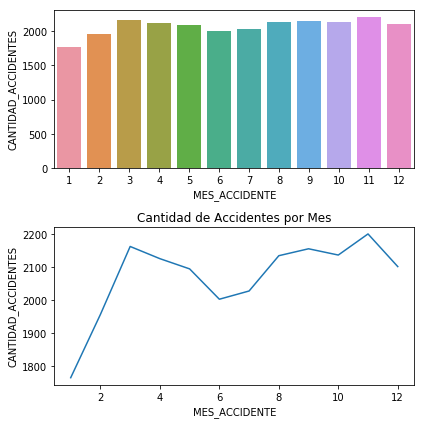

In [3]:
#Cantidad de accidentes por mes
data = accidentes_df.groupby('MES_ACCIDENTE').agg({'CANTIDAD_ACCIDENTES':sum}).reset_index()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2,1,1)
sns.barplot(x='MES_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)
ax = fig.add_subplot(2,1,2)
sns.lineplot(x='MES_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)
ax.set(title='Cantidad de Accidentes por Mes')
plt.tight_layout()
plt.show()

En total, el patrón sigue siendo el mismo, donde Enero, Junio y Diciembre presentan los picos más bajos y entre Febrero y Marzo, junto con Octubre y Noviembre el mayor aumento. 

Si se tiene en cuenta **sólo accidentes con heridos**, la distribución es:

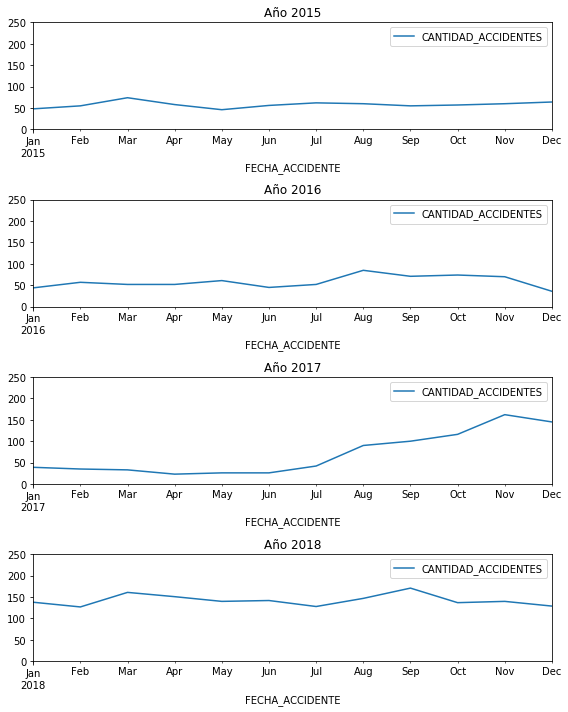

In [4]:
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == "Con heridos"]
years = accidentes_df_filter['AÑO_ACCIDENTE'].unique()
fig = plt.figure(figsize=(8,10))
for year in years:
    monthly_data = (accidentes_df_filter[accidentes_df_filter['AÑO_ACCIDENTE'] == year]
                    .set_index('FECHA_ACCIDENTE')
                    .groupby(pd.Grouper(freq='m'))
                    .agg({'CANTIDAD_ACCIDENTES':sum}))
    ax = fig.add_subplot(len(years),1,year - min(years)+1)
    monthly_data.plot(ax=ax)
    ax.set(title='Año '+str(year), ylim=((0,250)))
plt.tight_layout()
plt.show()

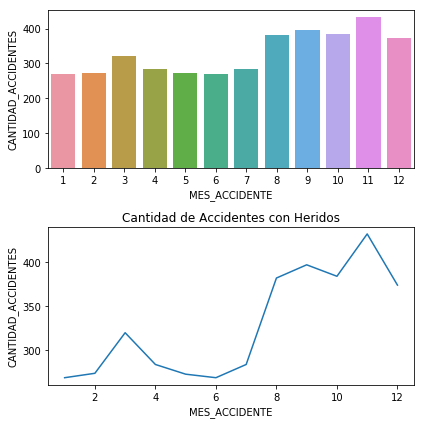

In [5]:
#Cantidad de accidentes con heridos
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == "Con heridos"]
data = accidentes_df_filter.groupby('MES_ACCIDENTE').agg({'CANTIDAD_ACCIDENTES':sum}).reset_index()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2,1,1)
sns.barplot(x='MES_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)

ax = fig.add_subplot(2,1,2)
sns.lineplot(x='MES_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)
ax.set(title='Cantidad de Accidentes con Heridos')

plt.tight_layout()
plt.show()

El comportamiento de la distribución parece no tener mucho cambio al esperado (el de la totalidad de accidentes).

Si se tiene en cuenta **Sólo accidentes con muertos**, la distribución es:

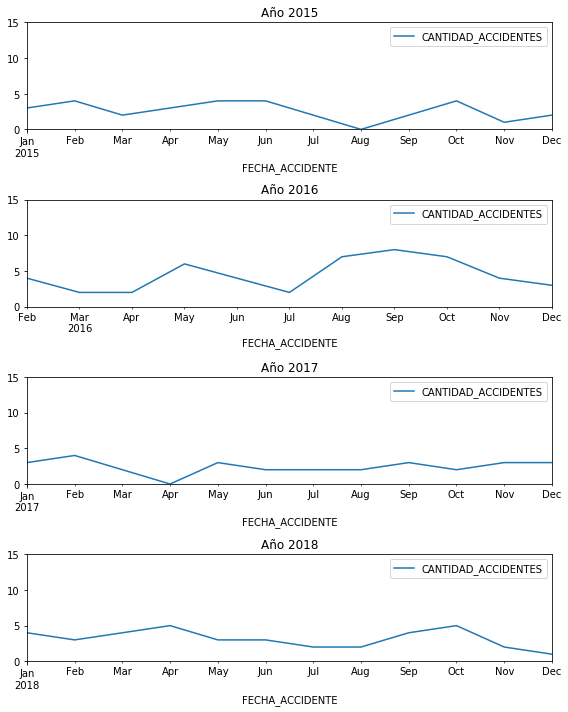

In [6]:
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == "Con muertos"]
years = accidentes_df_filter['AÑO_ACCIDENTE'].unique()
fig = plt.figure(figsize=(8,10))
for year in years:
    monthly_data = (accidentes_df_filter[accidentes_df_filter['AÑO_ACCIDENTE'] == year]
                    .set_index('FECHA_ACCIDENTE')
                    .groupby(pd.Grouper(freq='m'))
                    .agg({'CANTIDAD_ACCIDENTES':sum}))
    ax = fig.add_subplot(len(years),1,year - min(years)+1)
    monthly_data.plot(ax=ax)
    ax.set(title='Año '+str(year), ylim=((0,15)))
plt.tight_layout()
plt.show()

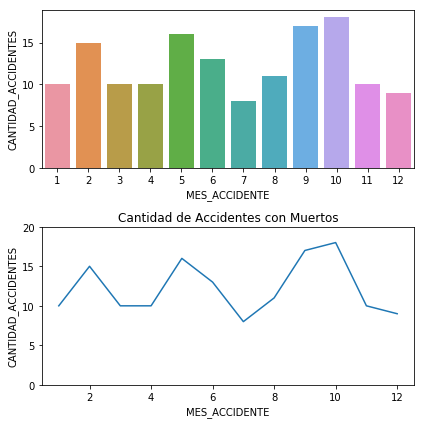

In [7]:
#Cantidad de accidentes con muertos
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == "Con muertos"]
data = accidentes_df_filter.groupby('MES_ACCIDENTE').agg({'CANTIDAD_ACCIDENTES':sum}).reset_index()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2,1,1)
sns.barplot(x='MES_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)

ax = fig.add_subplot(2,1,2)
sns.lineplot(x='MES_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)
ax.set(title='Cantidad de Accidentes con Muertos', ylim=(0,20))

plt.tight_layout()
plt.show()

El comportamiento de los accidentes con muertos, aunque sigue moderadamente el patrón en los meses críticos, el comportamiento en el resto de meses es más inusual.

El comportamiento **por clase de accidente** es:

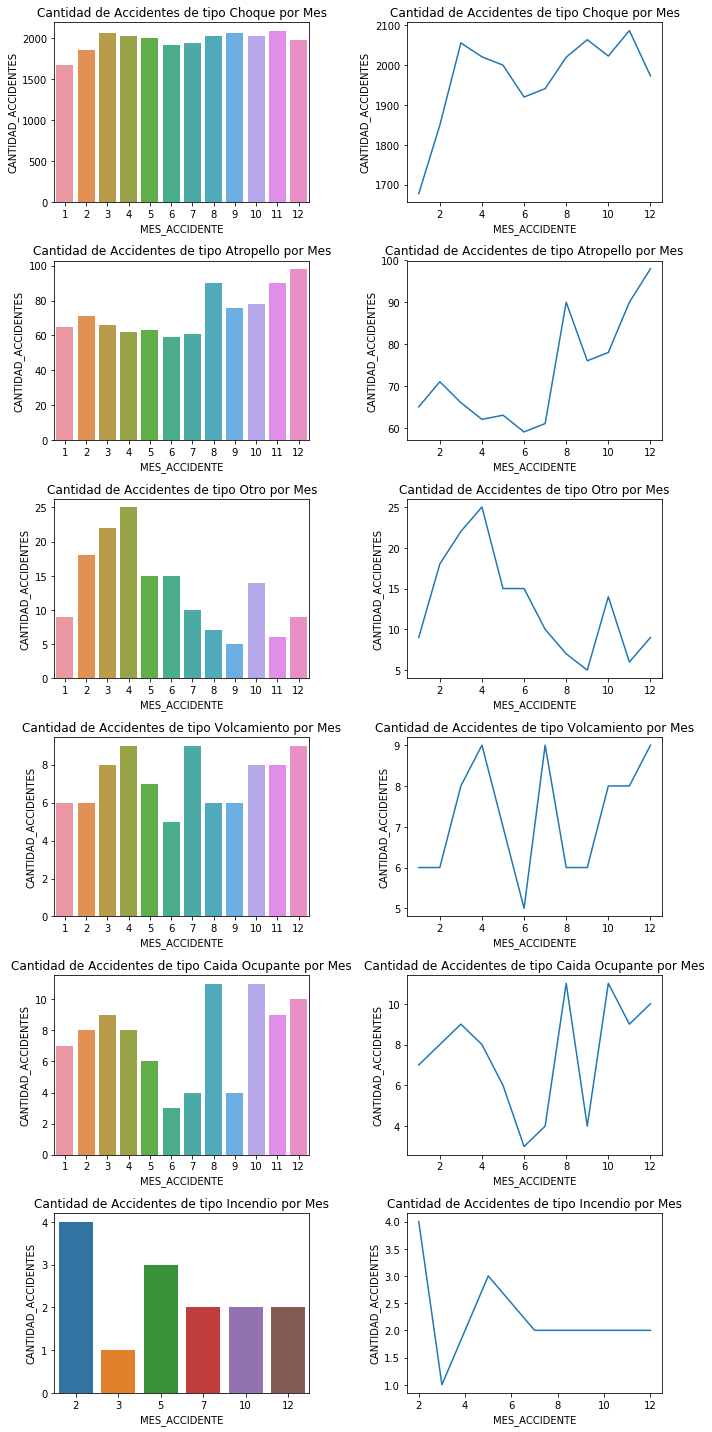

In [8]:
#Cantidad de accidentes por clase
clases_accidentes = accidentes_df['CLASE_ACCIDENTE'].unique()
fig, axs = plt.subplots(figsize=((10,20)),nrows=len(clases_accidentes), ncols=2)
i=0
for clase_accidente in clases_accidentes:    
    accidentes_df_filter = accidentes_df[accidentes_df['CLASE_ACCIDENTE'] == clase_accidente]
    data = accidentes_df_filter.groupby('MES_ACCIDENTE').agg({'CANTIDAD_ACCIDENTES':sum}).reset_index()
    
    sns.barplot(x='MES_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes de tipo {0} por Mes'.format(clase_accidente))
    
    sns.lineplot(x='MES_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes de tipo {0} por Mes'.format(clase_accidente))
    i=i+2
plt.tight_layout()
plt.show()

A partir de los principales resultados que se obtienen son:
* Los accidentes de tipo Choque ocurren con mayor frecuencia en Marzo y en Noviembre.
* Agosto es el mes donde tienden a ocurrir más atropellos.

## Distribución semanal
Para la **totalidad** de accidentes se tiene la siguiente distribución:

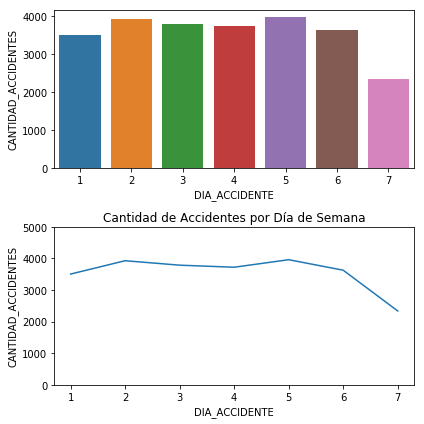

In [9]:
data = accidentes_df.copy().groupby('DIA_ACCIDENTE').agg({'CANTIDAD_ACCIDENTES':sum}).reset_index()
_map = {"Lun":1, "Mar":2, "Mié":3, "Jue":4, "Vie":5, "Sáb":6, "Dom":7}
data['DIA_ACCIDENTE'] = data['DIA_ACCIDENTE'].map(_map)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2,1,1)
sns.barplot(x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)

ax = fig.add_subplot(2,1,2)
sns.lineplot(x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, sort=True,  ax=ax)
ax.set(title='Cantidad de Accidentes por Día de Semana', ylim=((0,5000)))
plt.tight_layout()
plt.show()

Inicialmente se encuentra una tendencia de grandes cantidades de accidentes de lunes a viernes, con mayor número de accidentes registrados los martes y viernes. Resulta interesante ver si esta tendencia ocurre igual en todos los meses del año.

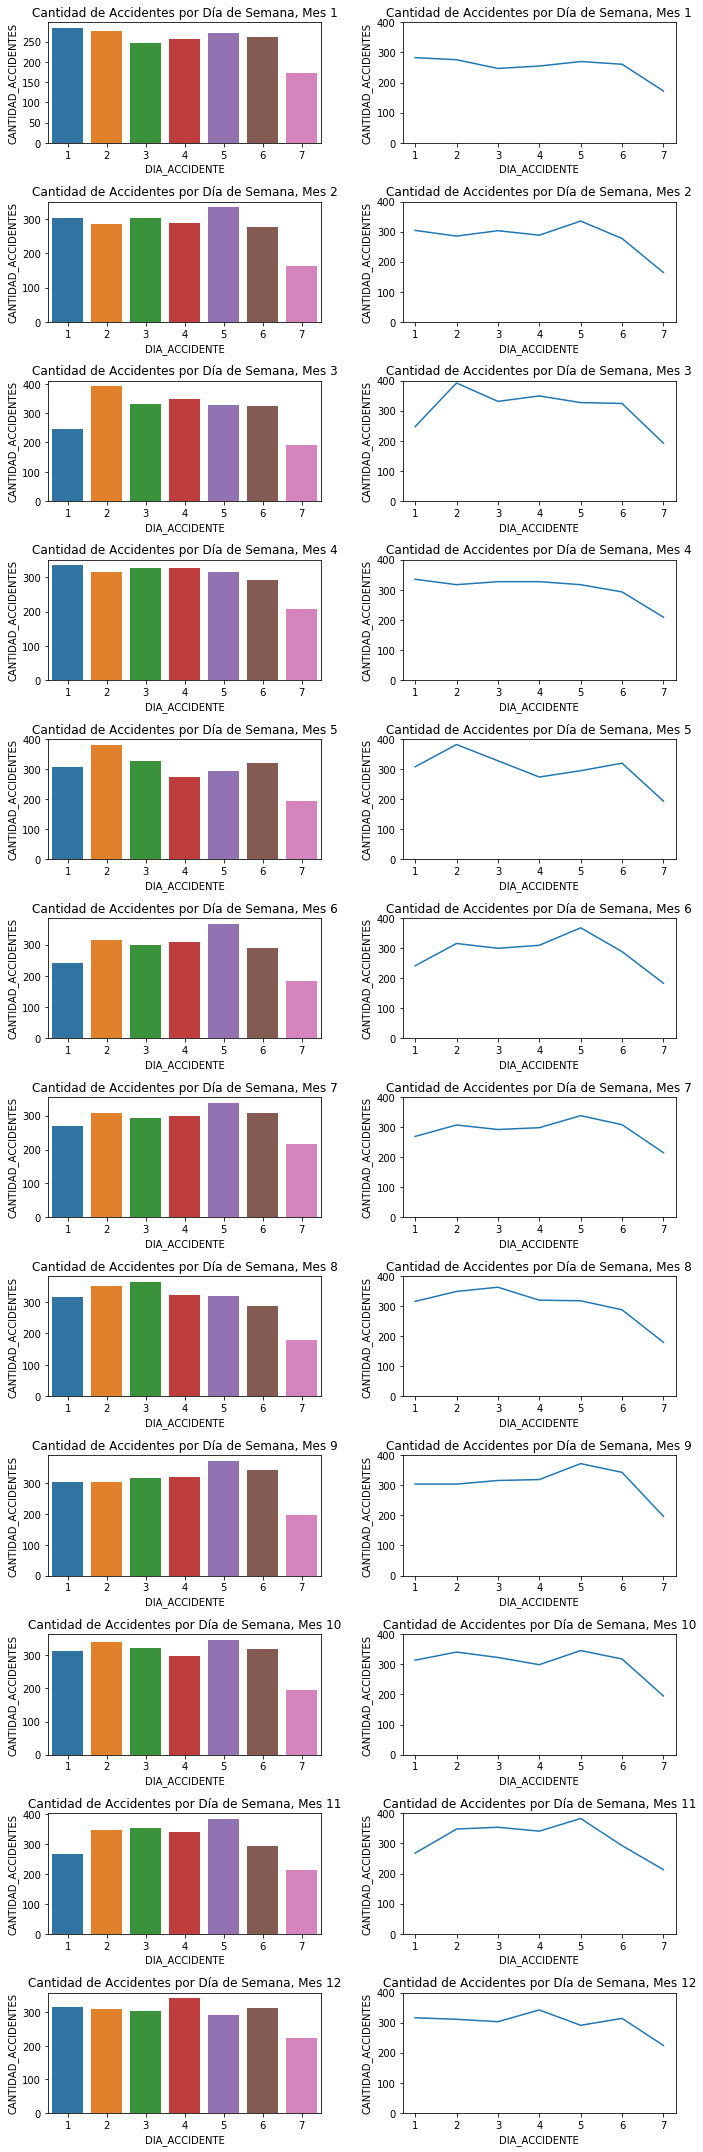

In [10]:
months = sorted(accidentes_df['MES_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,30), nrows=len(months), ncols=2)
i=0
for month in months:
    accidentes_df_filter = accidentes_df[accidentes_df['MES_ACCIDENTE'] == month]
    data = accidentes_df_filter.copy().groupby('DIA_ACCIDENTE').agg({'CANTIDAD_ACCIDENTES':sum}).reset_index()
    _map = {"Lun":1, "Mar":2, "Mié":3, "Jue":4, "Vie":5, "Sáb":6, "Dom":7}
    data['DIA_ACCIDENTE'] = data['DIA_ACCIDENTE'].map(_map)

    sns.barplot(x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes por Día de Semana, Mes {0}'.format(month))

    sns.lineplot(x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, sort=True,  ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes por Día de Semana, Mes {0}'.format(month), ylim=((0,400)))
    i=i+2
plt.tight_layout()
plt.show()

Aunque el comportamiento es variado en cada mes, es posible apreciar que el patrón comun en todos es el pico los días viernes que va disminuyendo hasta el domingo. Luego, es posible afirmar que si existe un patrón semanal en los datos.

Si se tiene en cuenta **sólo accidentes con heridos** se obtienen los siguientes resultados:

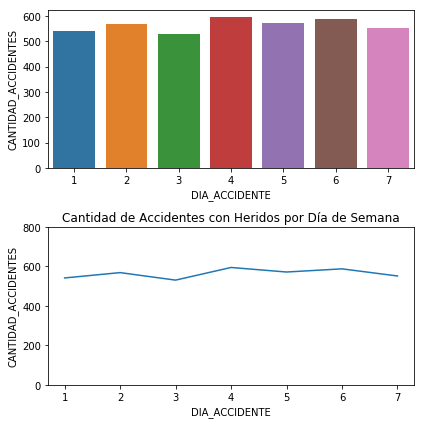

In [11]:
#TODO: Distribución semanal por heridos...
data = (accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == "Con heridos"].copy()
        .groupby('DIA_ACCIDENTE')
        .agg({'CANTIDAD_ACCIDENTES':sum})
        .reset_index())

_map = {"Lun":1, "Mar":2, "Mié":3, "Jue":4, "Vie":5, "Sáb":6, "Dom":7}
data['DIA_ACCIDENTE'] = data['DIA_ACCIDENTE'].map(_map)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2,1,1)
sns.barplot(x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)

ax = fig.add_subplot(2,1,2)
sns.lineplot(x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, sort=True,  ax=ax)
ax.set(title='Cantidad de Accidentes con Heridos por Día de Semana', ylim=((0,800)))
plt.tight_layout()
plt.show()

Los accidentes con heridos muestran un comportamiento constante para todos los días de la semna, siendo el jueves el día con mayo cantidad de accidentes reportados a lo largo de los años (2015 - 2018).

Si se tiene en cuenta **sólo accidentes con muertos** los resultados son los siguientes:

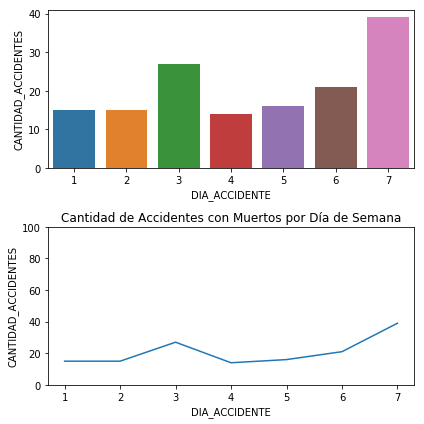

In [12]:
#TODO: Distribución semanal por heridos...
data = (accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == "Con muertos"].copy()
        .groupby('DIA_ACCIDENTE')
        .agg({'CANTIDAD_ACCIDENTES':sum})
        .reset_index())

_map = {"Lun":1, "Mar":2, "Mié":3, "Jue":4, "Vie":5, "Sáb":6, "Dom":7}
data['DIA_ACCIDENTE'] = data['DIA_ACCIDENTE'].map(_map)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2,1,1)
sns.barplot(x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)

ax = fig.add_subplot(2,1,2)
sns.lineplot(x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, sort=True,  ax=ax)
ax.set(title='Cantidad de Accidentes con Muertos por Día de Semana', ylim=((0,100)))
plt.tight_layout()
plt.show()

El comportamiento de los accidentes con muertos es muy diferente al de los accidentes en general. La diferencia más significativa puede verse los días Domingo, donde la cantidad de accidentes se diferencia de la media en casi 2 desviaciones estándar. Domingo entonces se presenta como el día con menos accidentes en general pero con la letalidad más alta.

El comportamiento semanal **por típo de accidente** es presentado a continuación:

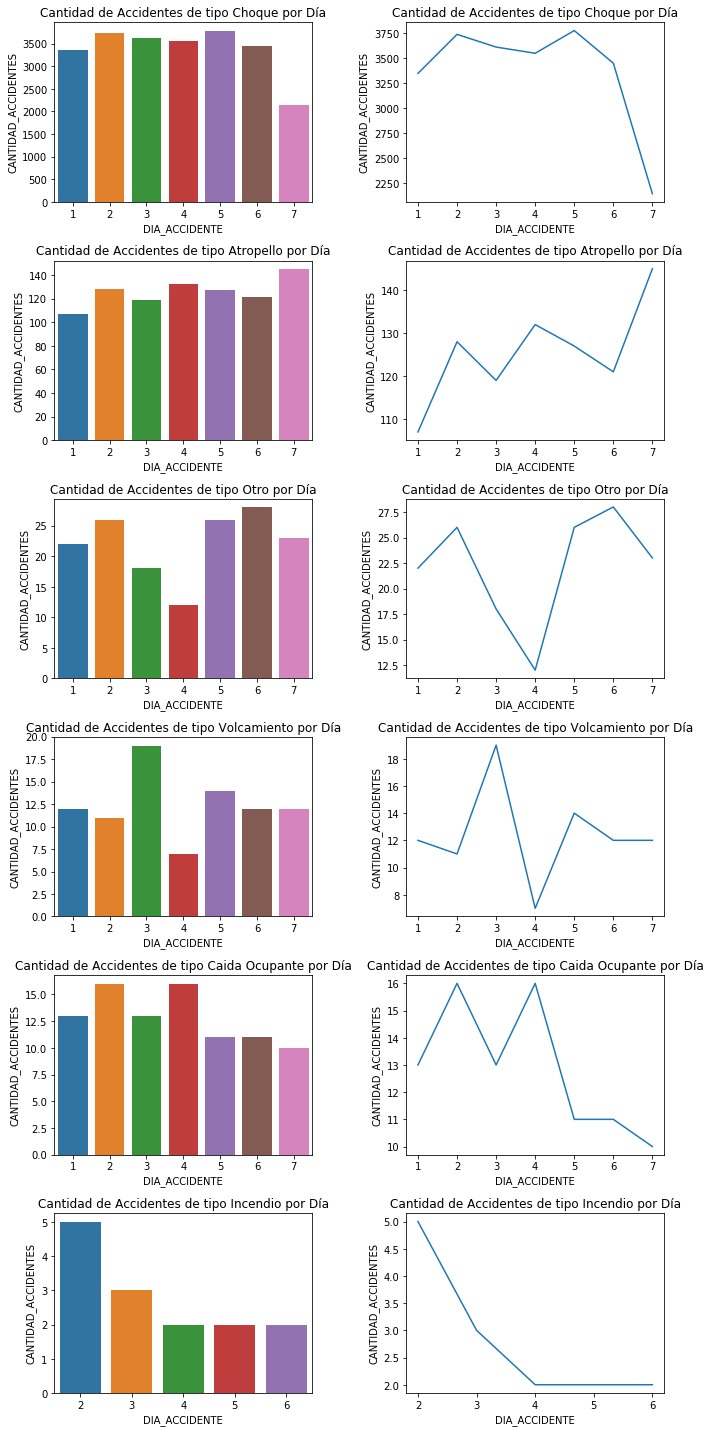

In [13]:
#Cantidad de accidentes por clase
clases_accidentes = accidentes_df['CLASE_ACCIDENTE'].unique()
fig, axs = plt.subplots(figsize=((10,20)),nrows=len(clases_accidentes), ncols=2)
i=0
for clase_accidente in clases_accidentes:    
    accidentes_df_filter = accidentes_df[accidentes_df['CLASE_ACCIDENTE'] == clase_accidente]
    data = accidentes_df_filter.groupby('DIA_ACCIDENTE').agg({'CANTIDAD_ACCIDENTES':sum}).reset_index()
    _map = {"Lun":1, "Mar":2, "Mié":3, "Jue":4, "Vie":5, "Sáb":6, "Dom":7}
    data['DIA_ACCIDENTE'] = data['DIA_ACCIDENTE'].map(_map)
    
    sns.barplot(x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes de tipo {0} por Día'.format(clase_accidente))
    
    sns.lineplot(x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes de tipo {0} por Día'.format(clase_accidente))
    i=i+2
plt.tight_layout()
plt.show()

De los resultados, los aspectos más relevantes són:
* Los choques ocurren en proporciones similares de Lunes a Sábado, con una disminución significativa los domingos y con pico los días martes y viernes.
* En accidentes con atropello de peatones, el día Domingo es el día más crítico. Para el resto de días el comportamiento es más centrado en la media.

## Distribución por momento del día
El la fase de ingeniería de características para este dataset se dividió la hora exacta del accidente por rangos que determinaran el momento del día a la hora del accidente. La regla de conversión fue:

![distribution_of_hours](https://i.imgur.com/LadbQGU.jpg "Distribución de horas por categoría")

A continuación se presenta información de la cantidad de accidentes registrados en estos momentos del día.

Para la **totalidad** de los datos, la distribución es:

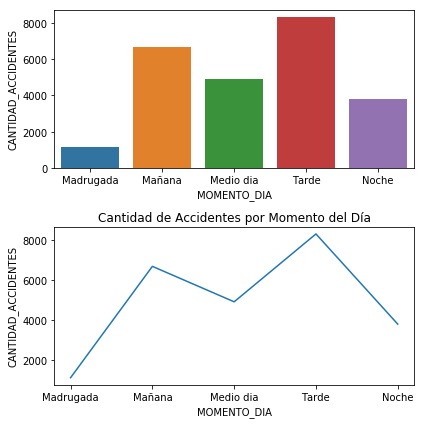

In [14]:
data = accidentes_df.groupby('MOMENTO_DIA').agg({'CANTIDAD_ACCIDENTES':sum}).reset_index()

day_moment_dtype = pd.api.types.CategoricalDtype(categories=['Madrugada', 'Mañana', 'Medio dia', 'Tarde', 'Noche']
                                                 ,ordered=True)

data['MOMENTO_DIA'] = data['MOMENTO_DIA'].astype(day_moment_dtype)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2,1,1)
sns.barplot(x='MOMENTO_DIA', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)

ax = fig.add_subplot(2,1,2)
sns.lineplot(x='MOMENTO_DIA', y='CANTIDAD_ACCIDENTES', data=data, sort=True, ax=ax)
ax.set(title='Cantidad de Accidentes por Momento del Día')

plt.tight_layout()
plt.show()

Encapsulando los años disponibles (2015 - 2018) se tiene que la mañana y la tarde son los momentos del día más críticos. Madrugada es el momento del día con menor cantidad de accidentes reportados.

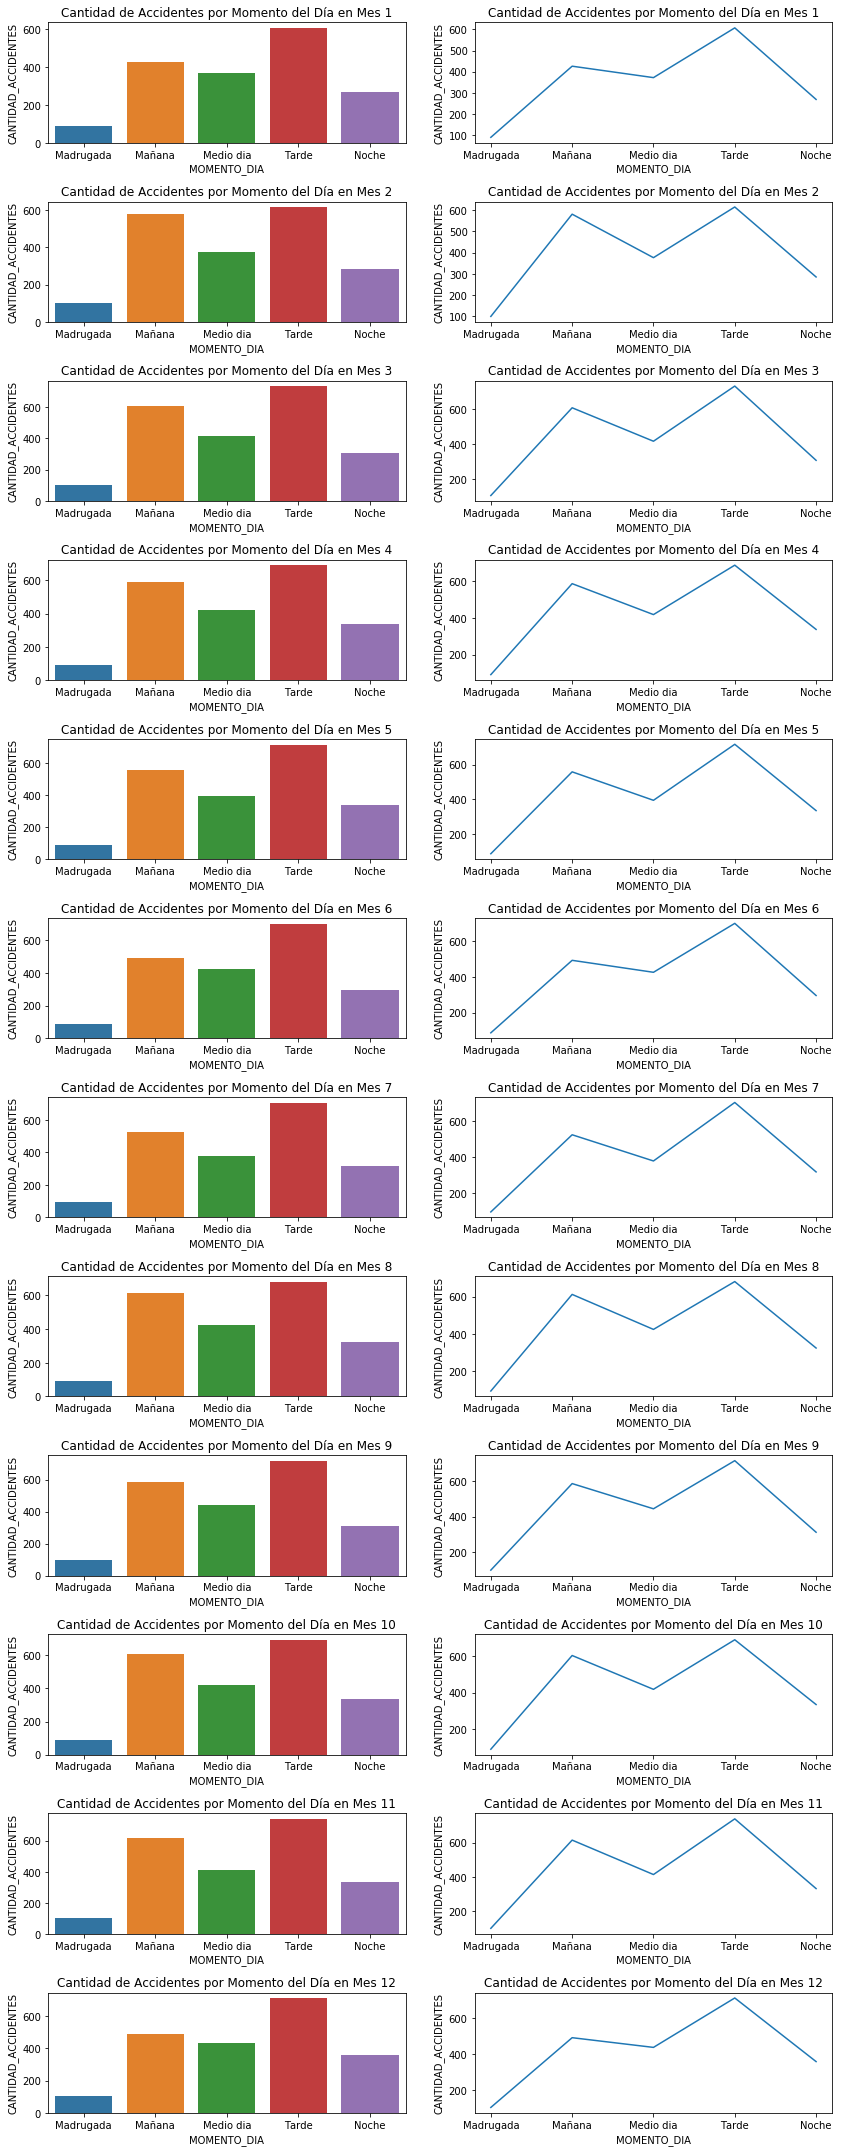

In [15]:
months = sorted(accidentes_df['MES_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(12,30), nrows=len(months), ncols=2)
i = 0
for month in months:
    data = (accidentes_df[accidentes_df['MES_ACCIDENTE'] == month]
            .groupby('MOMENTO_DIA')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())
    
    day_moment_dtype = pd.api.types.CategoricalDtype(categories=['Madrugada', 'Mañana', 'Medio dia', 'Tarde', 'Noche']
                                                     ,ordered=True)
    
    data['MOMENTO_DIA'] = data['MOMENTO_DIA'].astype(day_moment_dtype)

    sns.barplot(x='MOMENTO_DIA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes por Momento del Día en Mes {0}'.format(month))
    
    sns.lineplot(x='MOMENTO_DIA', y='CANTIDAD_ACCIDENTES', data=data, sort=True, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes por Momento del Día en Mes {0}'.format(month))
    i=i+2
plt.tight_layout()
plt.show()

El comportamiento general es similar todos los meses del año.

Si se tiene en cuenta **sólo accidentes con heridos** la distribución obtenida es:

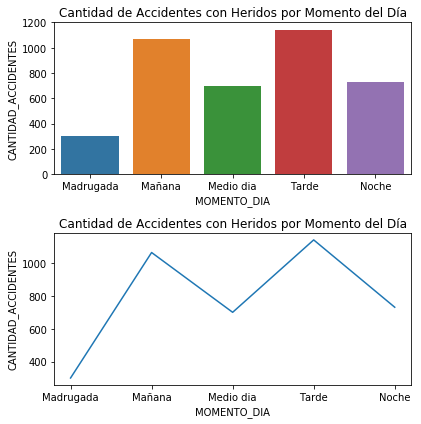

In [16]:
data = (accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == 'Con heridos']
        .groupby('MOMENTO_DIA')
        .agg({'CANTIDAD_ACCIDENTES':sum})
        .reset_index())

day_moment_dtype = pd.api.types.CategoricalDtype(categories=['Madrugada', 'Mañana', 'Medio dia', 'Tarde', 'Noche']
                                                 ,ordered=True)

data['MOMENTO_DIA'] = data['MOMENTO_DIA'].astype(day_moment_dtype)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2,1,1)
sns.barplot(x='MOMENTO_DIA', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)
ax.set(title='Cantidad de Accidentes con Heridos por Momento del Día')

ax = fig.add_subplot(2,1,2)
sns.lineplot(x='MOMENTO_DIA', y='CANTIDAD_ACCIDENTES', data=data, sort=True, ax=ax)
ax.set(title='Cantidad de Accidentes con Heridos por Momento del Día')

plt.tight_layout()
plt.show()

La distribución es similar a la general.

Si se tiene encuenta **sólo accidentes con muertos** el resultado es el siguiente:

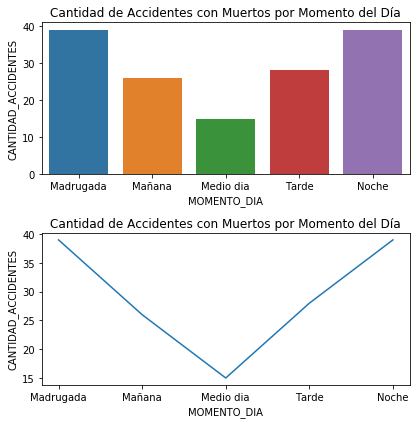

In [17]:
data = (accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == 'Con muertos']
        .groupby('MOMENTO_DIA')
        .agg({'CANTIDAD_ACCIDENTES':sum})
        .reset_index())

day_moment_dtype = pd.api.types.CategoricalDtype(categories=['Madrugada', 'Mañana', 'Medio dia', 'Tarde', 'Noche']
                                                 ,ordered=True)

data['MOMENTO_DIA'] = data['MOMENTO_DIA'].astype(day_moment_dtype)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2,1,1)
sns.barplot(x='MOMENTO_DIA', y='CANTIDAD_ACCIDENTES', data=data, ax=ax)
ax.set(title='Cantidad de Accidentes con Muertos por Momento del Día')

ax = fig.add_subplot(2,1,2)
sns.lineplot(x='MOMENTO_DIA', y='CANTIDAD_ACCIDENTES', data=data, sort=True, ax=ax)
ax.set(title='Cantidad de Accidentes con Muertos por Momento del Día')

plt.tight_layout()
plt.show()

En accidentes con muertos, las horas de la noche y madrugada son las de más alto riesgo, este patron es interesante dado que no es que se ve en la totalidad de accidentes.

Los accidentes **por tipo** según el momento del día en que ocurrieron presentan la siguiente distribución:

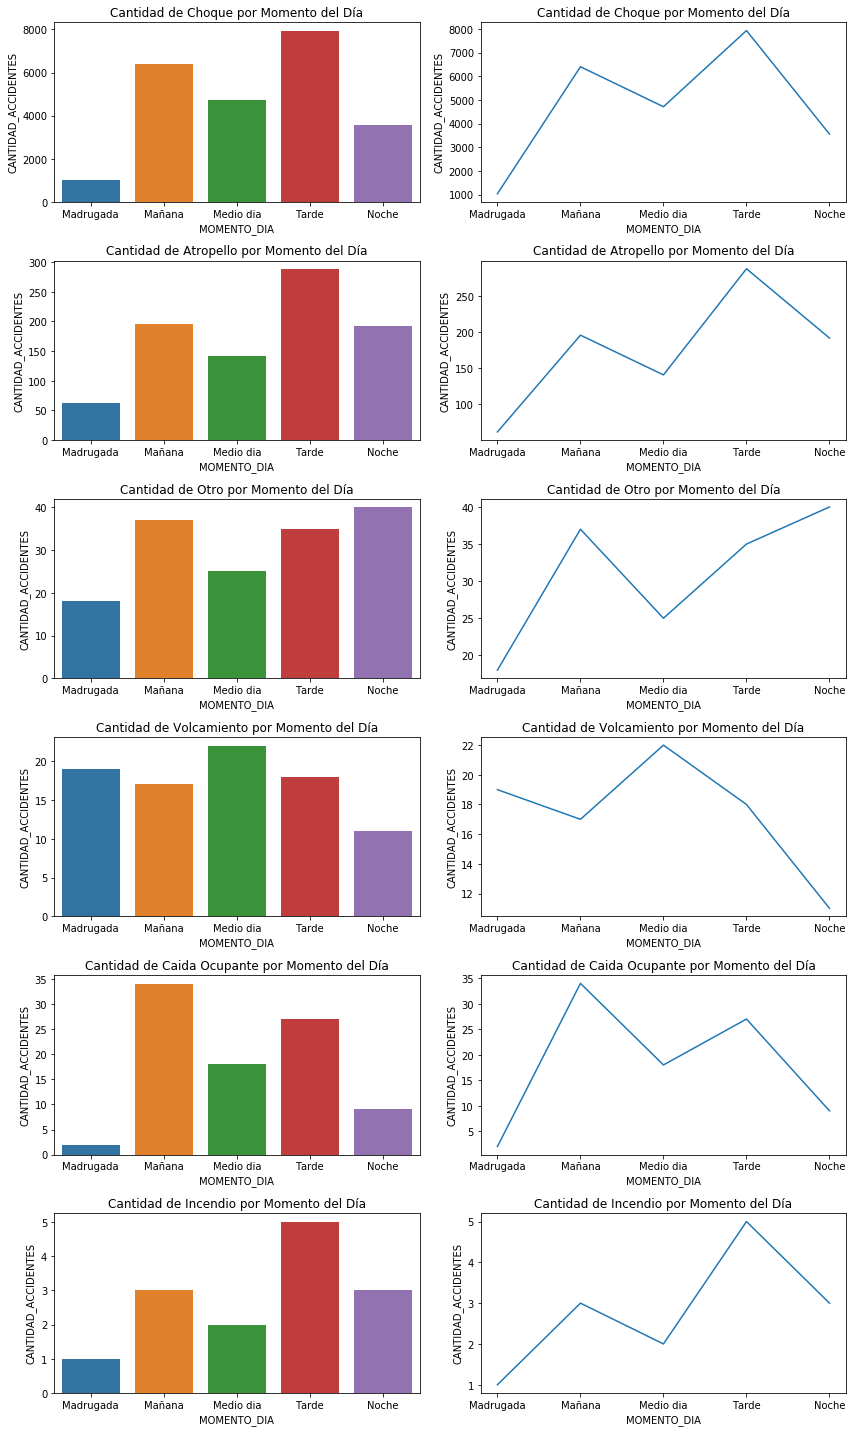

In [18]:
accident_types = accidentes_df['CLASE_ACCIDENTE'].unique()
fig, axs = plt.subplots(figsize=(12,20), nrows=len(accident_types), ncols=2)
i = 0
for accident_type in accident_types:
    data = (accidentes_df[accidentes_df['CLASE_ACCIDENTE'] == accident_type]
            .groupby('MOMENTO_DIA')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())
    
    day_moment_dtype = pd.api.types.CategoricalDtype(categories=['Madrugada', 'Mañana', 'Medio dia', 'Tarde', 'Noche']
                                                     ,ordered=True)
    
    data['MOMENTO_DIA'] = data['MOMENTO_DIA'].astype(day_moment_dtype)

    sns.barplot(x='MOMENTO_DIA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de {0} por Momento del Día'.format(accident_type))
    
    sns.lineplot(x='MOMENTO_DIA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de {0} por Momento del Día'.format(accident_type))
    i=i+2
plt.tight_layout()
plt.show()

Mañana y tarde son los momentos del día donde más se registran accidentes de tipo choque y atropello.

## Distribución por zona de la ciudad
Durante la fase de ingeniería de características se construyó un modelo de clustering para los accidentes de la ciudad, el cual resultó en la división de la ciudad en 3 zonas críticas en terminos de su accidentalidad. Las zonas fueron llamadas *NORTE*, *CENTRO* y *SUR* dada la ubicación de su centro en la ciudad.

La distribución del modelo fué:
![clusters_image](https://imgur.com/cBLSRTr.png)

Si se tiene en cuenta la **totalidad** de los accidentes, se obtienen los siguientes resultados.

In [19]:
accidentes_df.groupby(['AÑO_ACCIDENTE','ZONA']).agg({'CANTIDAD_ACCIDENTES':sum})

CANTIDAD_ACCIDENTES
AÑO_ACCIDENTE ZONA                       
2015          CENTRO                 2190
              NORTE                  3187
              SUR                     826
2016          CENTRO                 2242
              NORTE                  3304
              SUR                     935
2017          CENTRO                 2173
              NORTE                  3202
              SUR                     961
2018          CENTRO                 2010
              NORTE                  2887
              SUR                     939

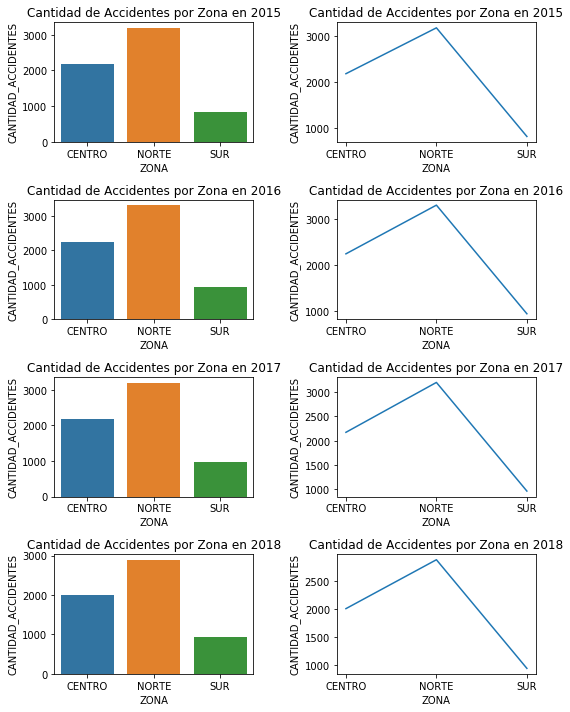

In [20]:
years = sorted(accidentes_df['AÑO_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(8,10), nrows=len(years), ncols=2)
i = 0
for year in years:
    data = (accidentes_df[accidentes_df['AÑO_ACCIDENTE'] == year]
            .groupby('ZONA')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes por Zona en {0}'.format(year))
    
    sns.lineplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes por Zona en {0}'.format(year))
    
    i=i+2
plt.tight_layout()
plt.show()

La zona norte es la que más accidentes reporta en los años de 2015 a 2018.

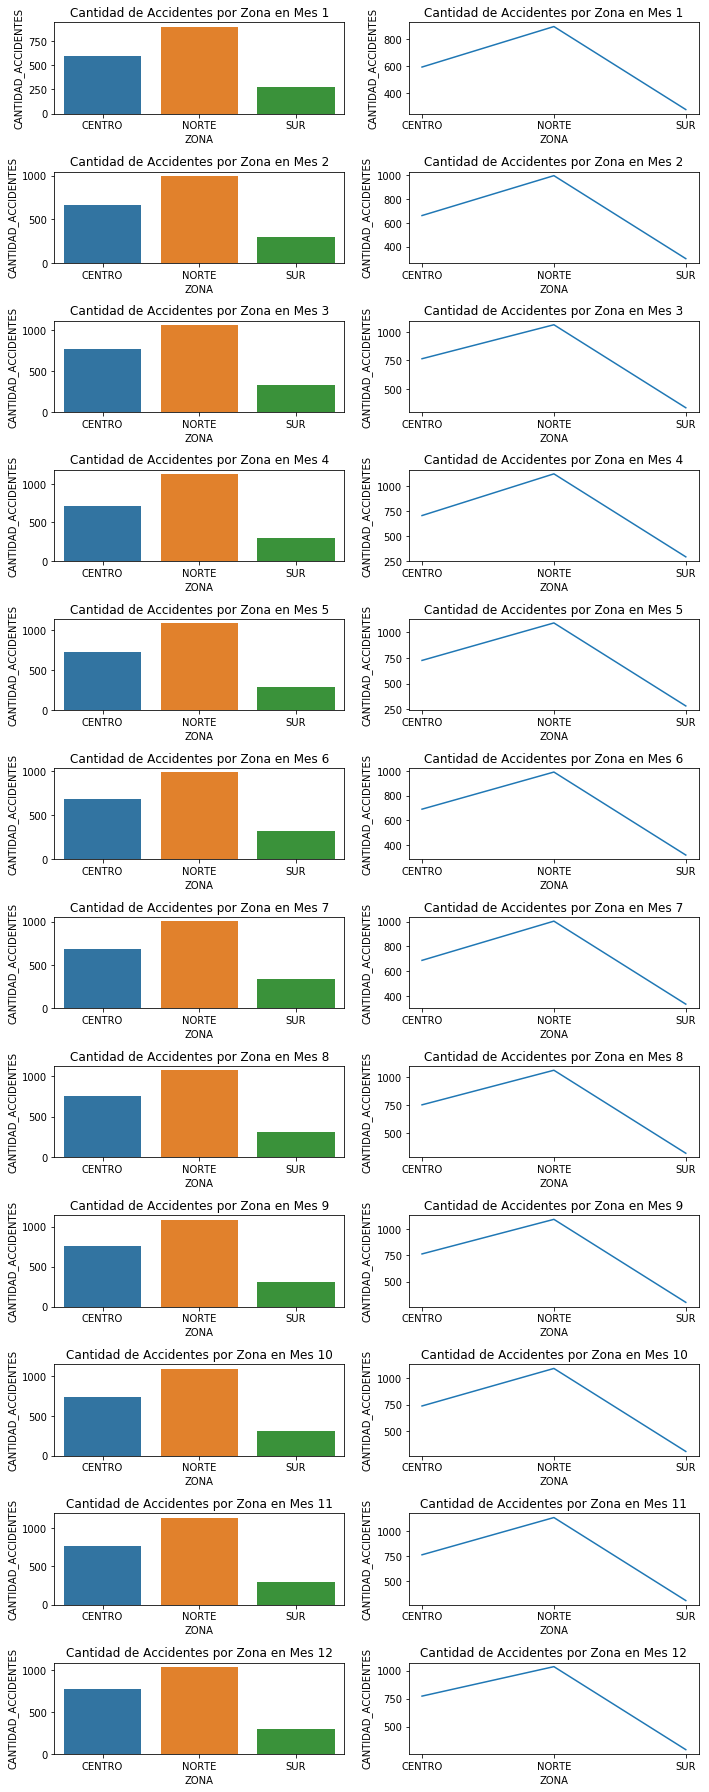

In [21]:
months = sorted(accidentes_df['MES_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,25), nrows=len(months), ncols=2)
i = 0
for month in months:
    data = (accidentes_df[accidentes_df['MES_ACCIDENTE'] == month]
            .groupby('ZONA')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes por Zona en Mes {0}'.format(month))
    
    sns.lineplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes por Zona en Mes {0}'.format(month))
    
    i=i+2
plt.tight_layout()
plt.show()

No hay cambios significativos entre los meses.

Si se tiene en cuenta **sólo accidentes con heridos** el resultado es el siguiente:

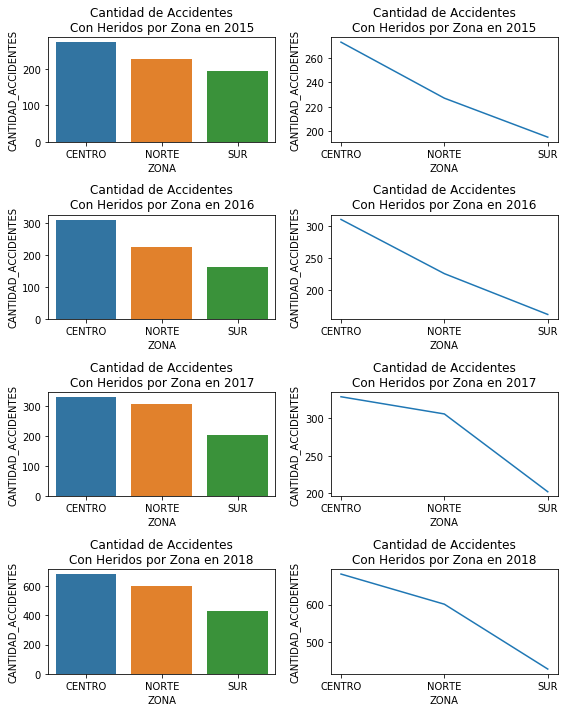

In [22]:
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == 'Con heridos']
years = sorted(accidentes_df['AÑO_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(8,10), nrows=len(years), ncols=2)
i = 0
for year in years:
    data = (accidentes_df_filter[accidentes_df_filter['AÑO_ACCIDENTE'] == year]
            .groupby('ZONA')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes\nCon Heridos por Zona en {0}'.format(year))
    
    sns.lineplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes\nCon Heridos por Zona en {0}'.format(year))
    
    i=i+2
plt.tight_layout()
plt.show()

En accidentes con heridos, la zona centro es la que más accidentes reporta en todos los años.

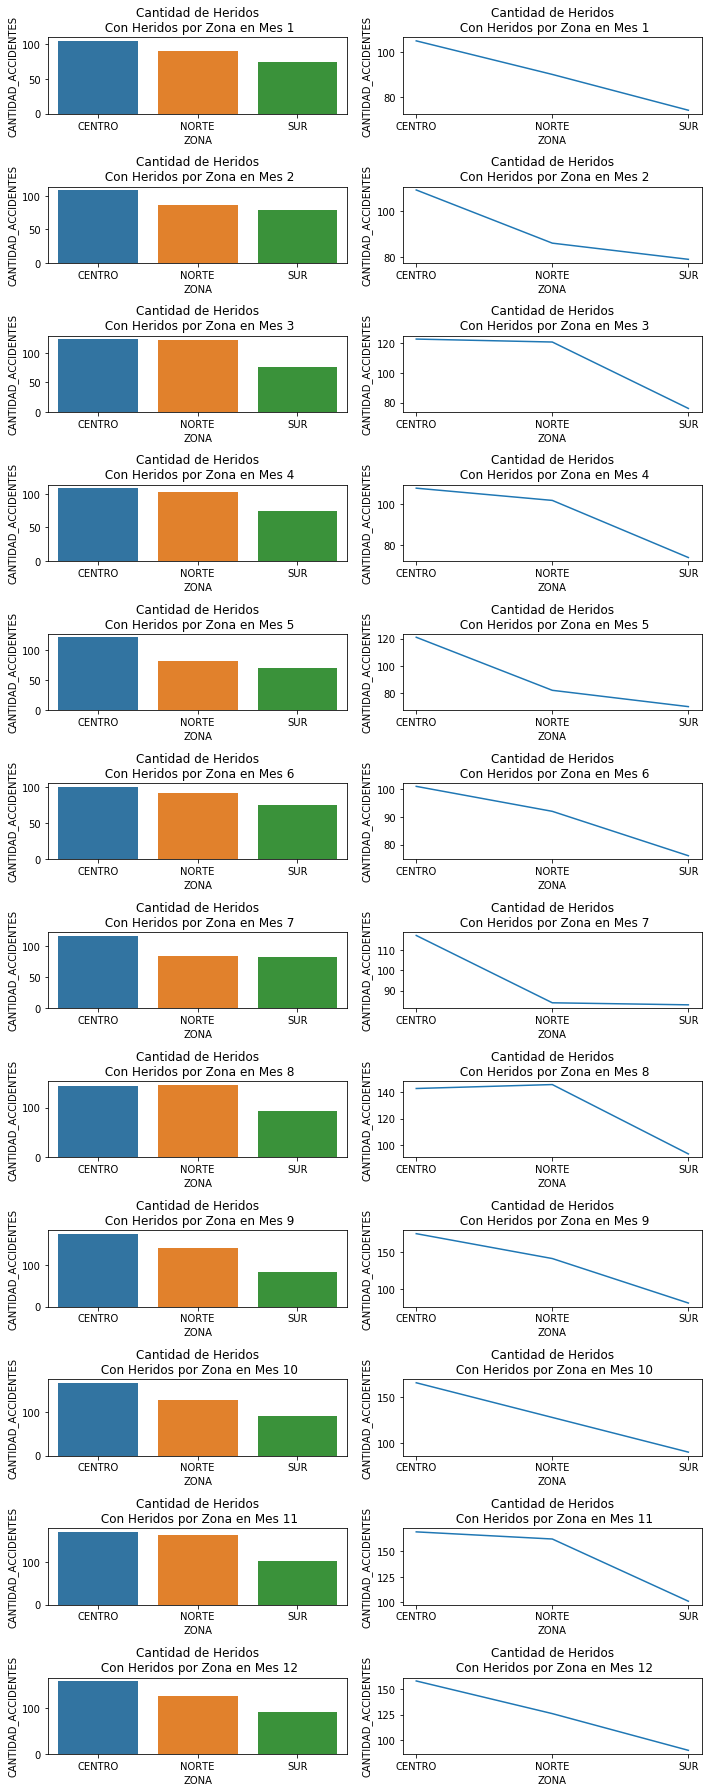

In [23]:
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == 'Con heridos']
months = sorted(accidentes_df['MES_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,25), nrows=len(months), ncols=2)
i = 0
for month in months:
    data = (accidentes_df_filter[accidentes_df_filter['MES_ACCIDENTE'] == month]
            .groupby('ZONA')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Heridos\n Con Heridos por Zona en Mes {0}'.format(month))
    
    sns.lineplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Heridos\n Con Heridos por Zona en Mes {0}'.format(month))
    
    i=i+2
plt.tight_layout()
plt.show()

Al analizar cada mes individualmente, hay determinados meses donde la zona norte llega a alcanzar la misma cantidad de accidetes con heridos que la zona centro, que se mantiene constante durante todo el año. El mes de Agosto es el único mes donde se reportan más accidentes en la zona norte que en el centro. 

Si se tiene en cuenta **sólo accidentes con muertos** el comportamiento de las zonas de la ciudad es el siguiente:

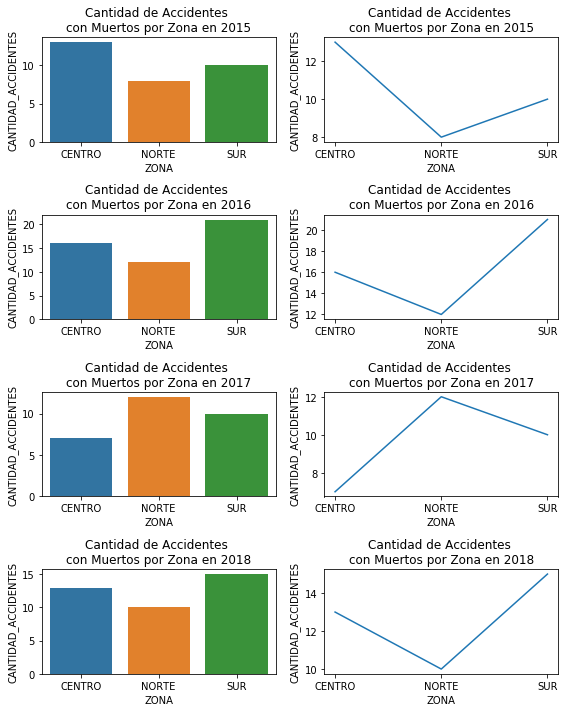

In [24]:
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == 'Con muertos']
years = sorted(accidentes_df['AÑO_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(8,10), nrows=len(years), ncols=2)
i = 0
for year in years:
    data = (accidentes_df_filter[accidentes_df_filter['AÑO_ACCIDENTE'] == year]
            .groupby('ZONA')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes \ncon Muertos por Zona en {0}'.format(year))
    
    sns.lineplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes \ncon Muertos por Zona en {0}'.format(year))
    
    i=i+2
plt.tight_layout()
plt.show()

El comportamiento de los accidentes fatales ha sido irregular, sin embargo, difiere del comportamiento general de los accidentes puesto que la zona sur es la que mayor frecuencia de accidentes con muertos presenta.

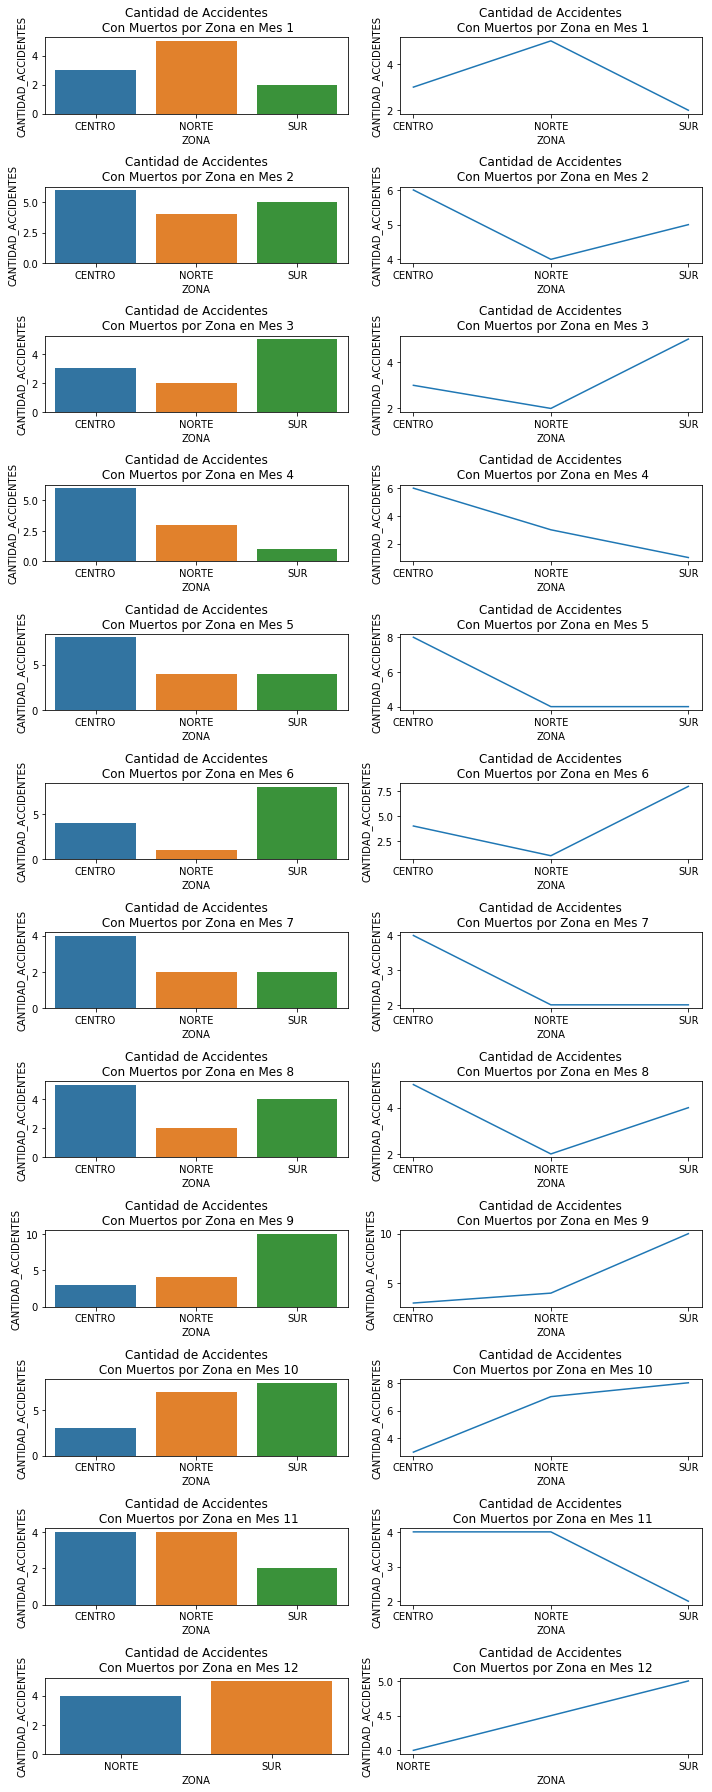

In [25]:
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == 'Con muertos']
months = sorted(accidentes_df['MES_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,25), nrows=len(months), ncols=2)
i = 0
for month in months:
    data = (accidentes_df_filter[accidentes_df_filter['MES_ACCIDENTE'] == month]
            .groupby('ZONA')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes\n Con Muertos por Zona en Mes {0}'.format(month))
    
    sns.lineplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes\n Con Muertos por Zona en Mes {0}'.format(month))
    
    i=i+2
plt.tight_layout()
plt.show()

El comportamiento por mes es variado, pero son las zonas del centro y el sur las que más muertos reportan mensualmente.

La distribución de los accidentes **según tipo** en cada zona es la siguiente:

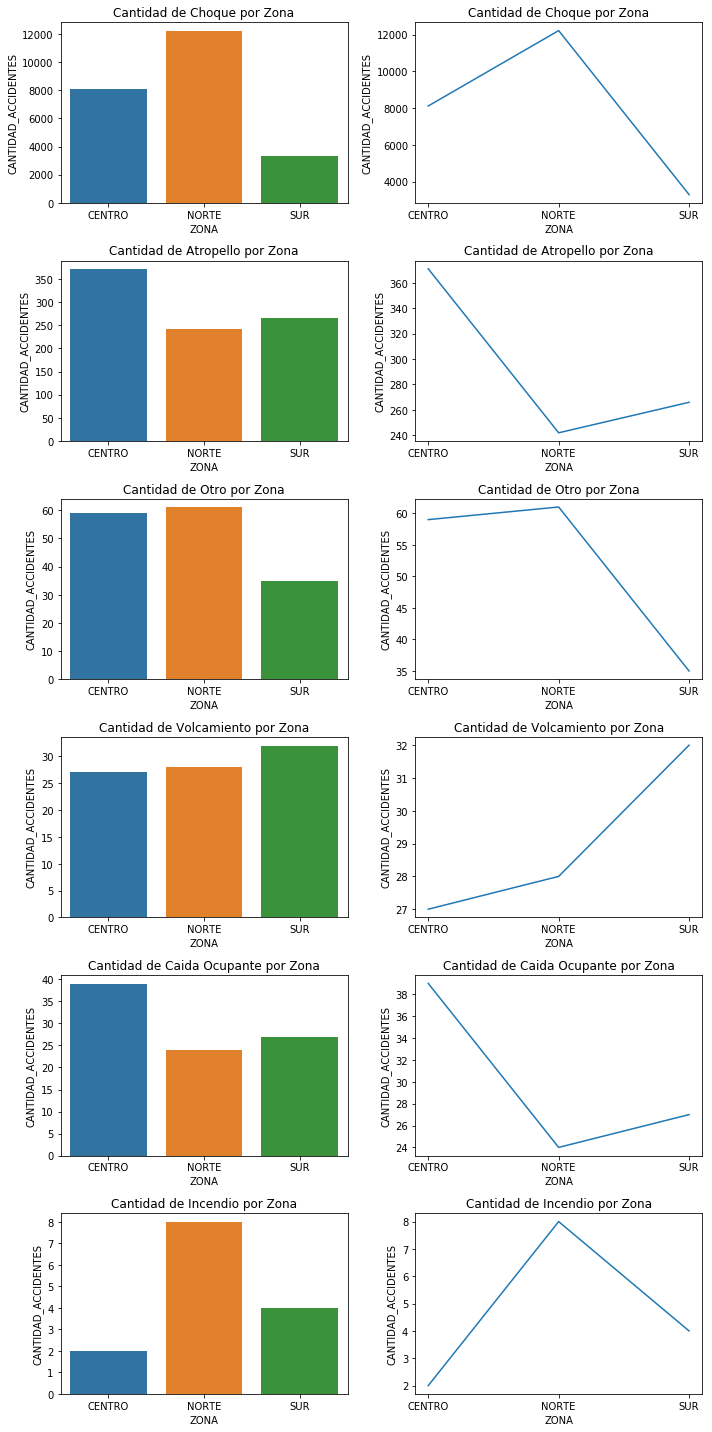

In [26]:
accident_types = accidentes_df['CLASE_ACCIDENTE'].unique()
fig, axs = plt.subplots(figsize=(10,20), nrows=len(accident_types), ncols=2)
i = 0
for accident_type in accident_types:
    data = (accidentes_df[accidentes_df['CLASE_ACCIDENTE'] == accident_type]
            .groupby('ZONA')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de {0} por Zona'.format(accident_type))
    
    sns.lineplot(x='ZONA', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de {0} por Zona'.format(accident_type))
    
    i=i+2
plt.tight_layout()
plt.show()

Los accidentes por choque en la zona norte son los más comunes, mientras que atropello es más común en el centro.

## Distribución día de semana vs fines de semana
Cuando se tiene en cuenta la **totalidad** de los datos, la distribución de días de la semana contra los fines de semana es la siguiente:

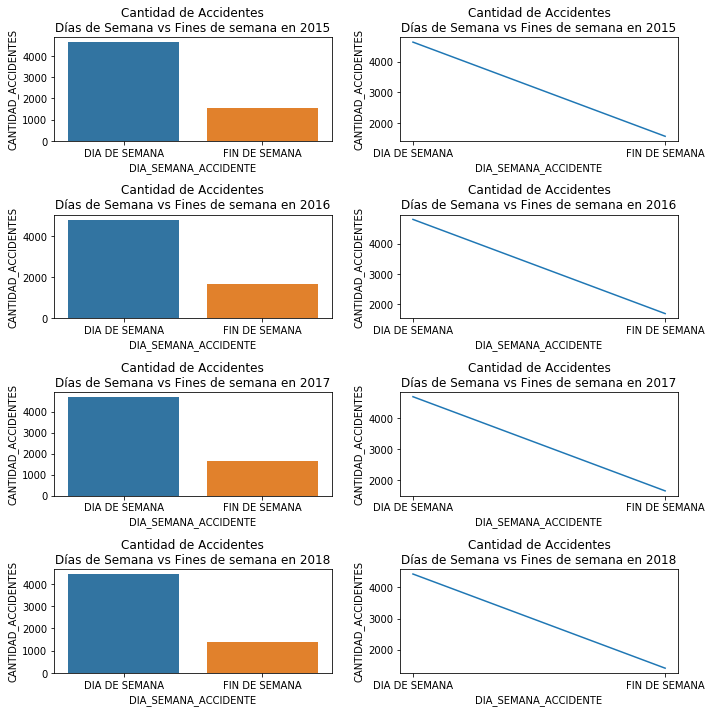

In [27]:
years = sorted(accidentes_df['AÑO_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,10), nrows=len(years), ncols=2)
i = 0
for year in years:
    data = (accidentes_df[accidentes_df['AÑO_ACCIDENTE'] == year]
            .groupby('DIA_SEMANA_ACCIDENTE')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes\nDías de Semana vs Fines de semana en {0}'.format(year))
    
    sns.lineplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes\nDías de Semana vs Fines de semana en {0}'.format(year))
    
    i=i+2
plt.tight_layout()
plt.show()

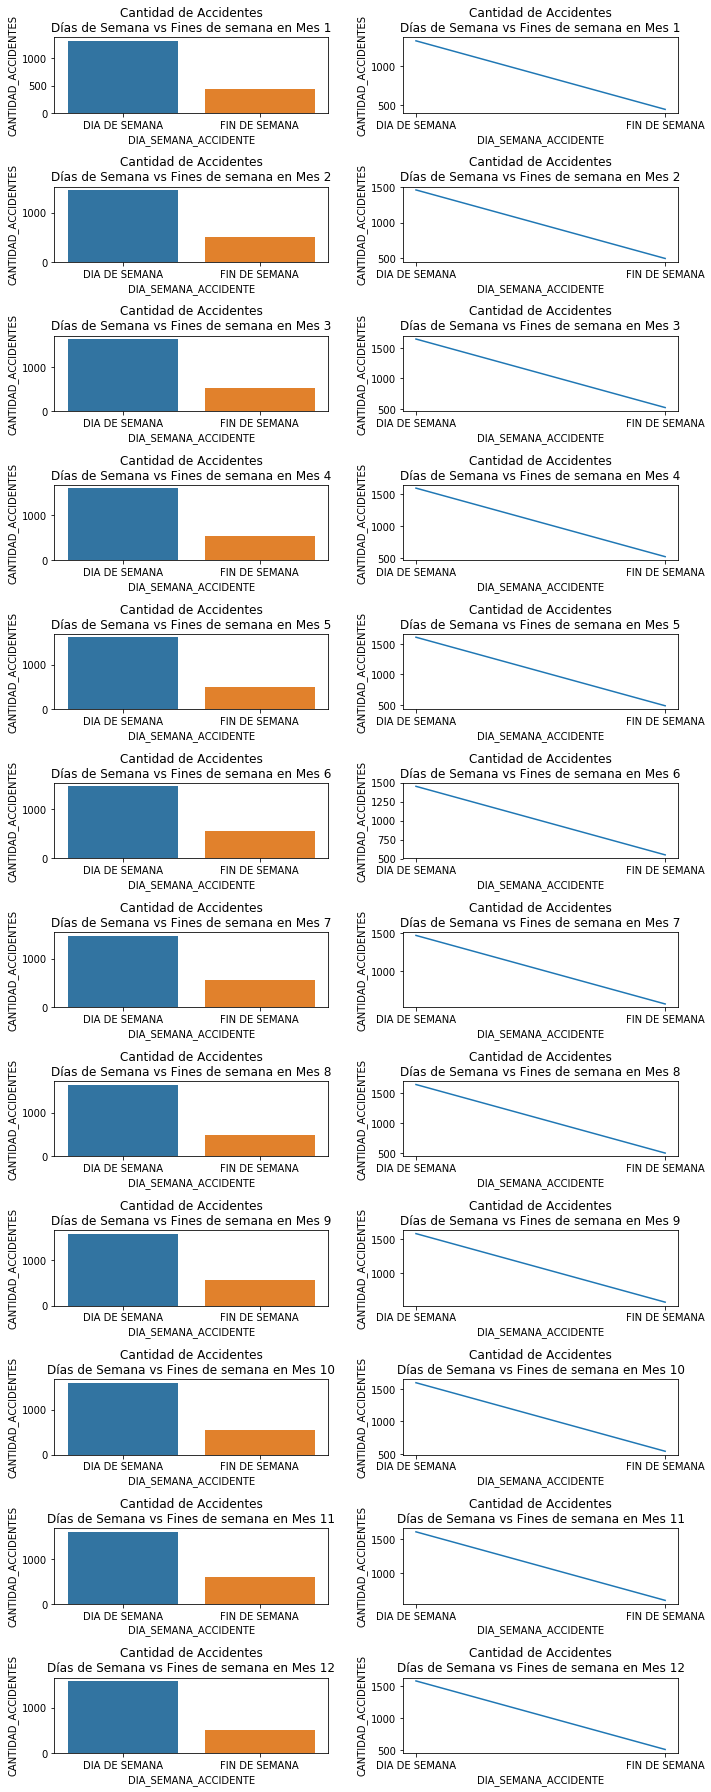

In [28]:
months = sorted(accidentes_df['MES_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,25), nrows=len(months), ncols=2)
i = 0
for month in months:
    data = (accidentes_df[accidentes_df['MES_ACCIDENTE'] == month]
            .groupby('DIA_SEMANA_ACCIDENTE')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes\nDías de Semana vs Fines de semana en Mes {0}'.format(month))
    
    sns.lineplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes\nDías de Semana vs Fines de semana en Mes {0}'.format(month))
    
    i=i+2
plt.tight_layout()
plt.show()

No hay una diferencia significativa en el comportamiento de días de semana vs fines de semana ni anual ni mensualmente.

Considerando **sólo accidentes con heridos** se obtienen los siguientes resultados:

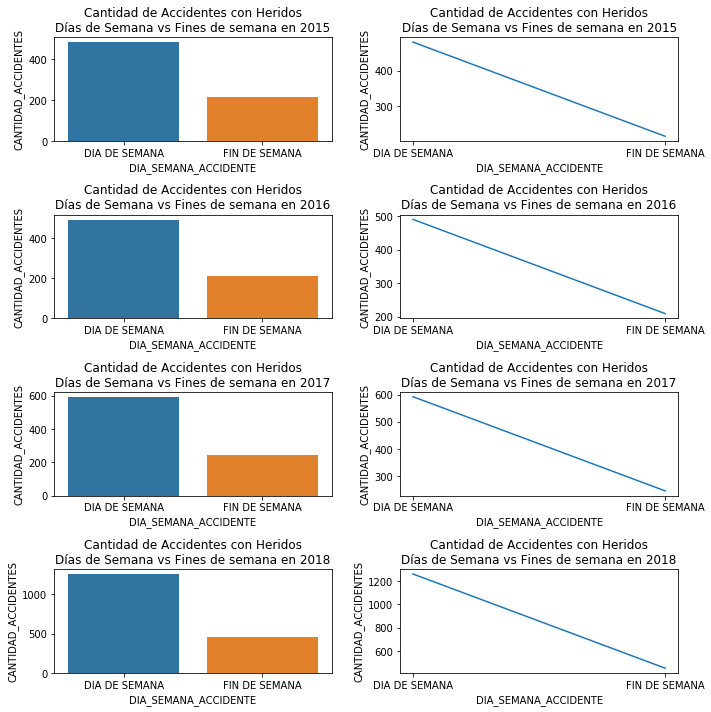

In [29]:
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == 'Con heridos']
years = sorted(accidentes_df['AÑO_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,10), nrows=len(years), ncols=2)
i = 0
for year in years:
    data = (accidentes_df_filter[accidentes_df_filter['AÑO_ACCIDENTE'] == year]
            .groupby('DIA_SEMANA_ACCIDENTE')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes con Heridos\nDías de Semana vs Fines de semana en {0}'.format(year))
    
    sns.lineplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes con Heridos\nDías de Semana vs Fines de semana en {0}'.format(year))
    
    i=i+2
plt.tight_layout()
plt.show()

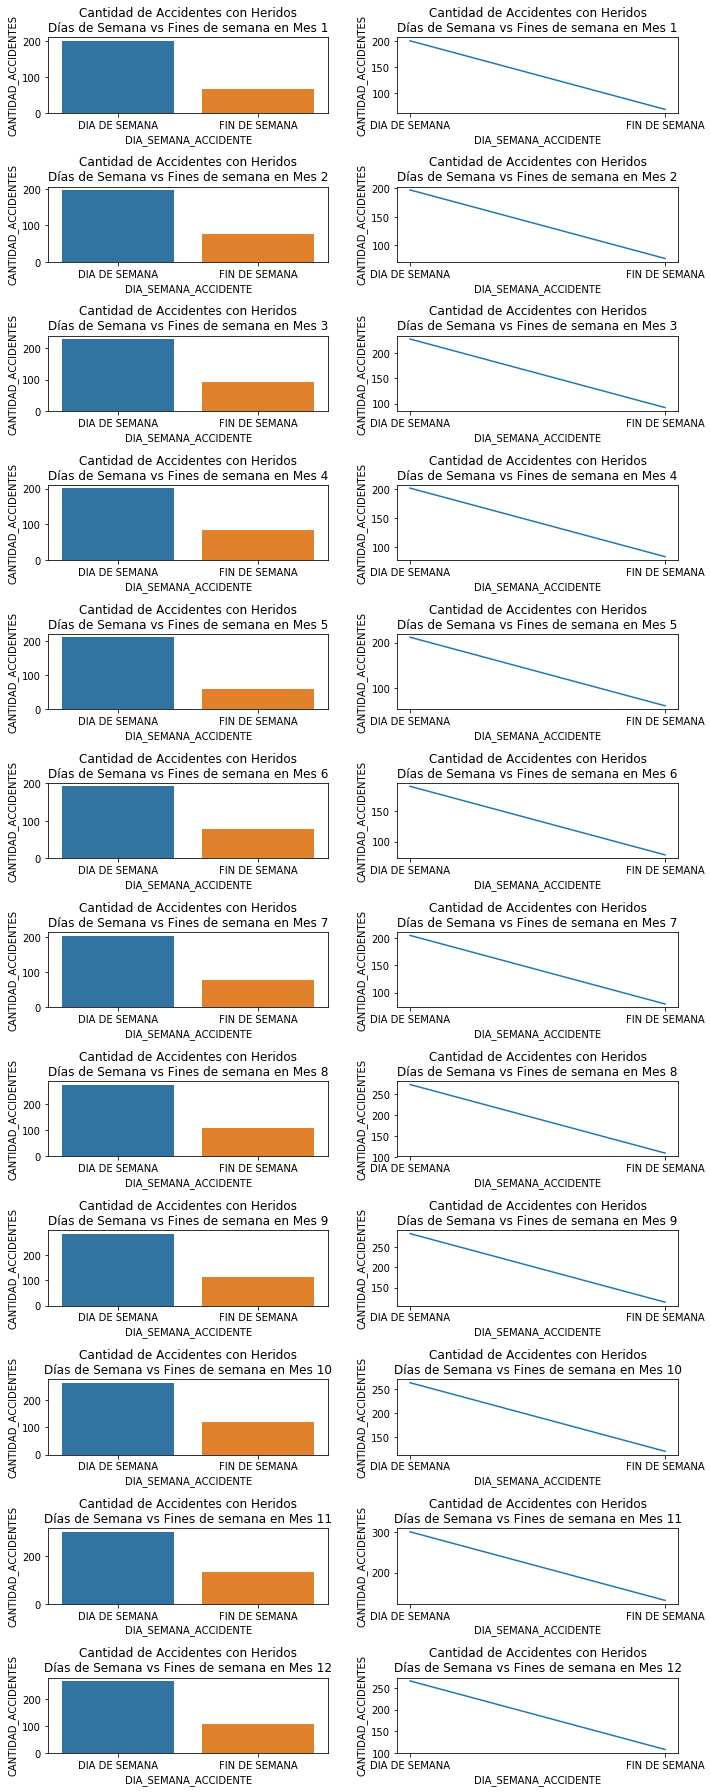

In [30]:
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == 'Con heridos']
months = sorted(accidentes_df['MES_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,25), nrows=len(months), ncols=2)
i = 0
for month in months:
    data = (accidentes_df_filter[accidentes_df_filter['MES_ACCIDENTE'] == month]
            .groupby('DIA_SEMANA_ACCIDENTE')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes con Heridos\nDías de Semana vs Fines de semana en Mes {0}'.format(month))
    
    sns.lineplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes con Heridos\nDías de Semana vs Fines de semana en Mes {0}'.format(month))
    
    i=i+2
plt.tight_layout()
plt.show()

El comportamiento de los accidentes con heridos sigue el mismo patron al de los accidentes generales tanto anual como mesualmente.

Si se tiene en cuenta **sólo accidentes con muertos** el resultado es el siguiente:

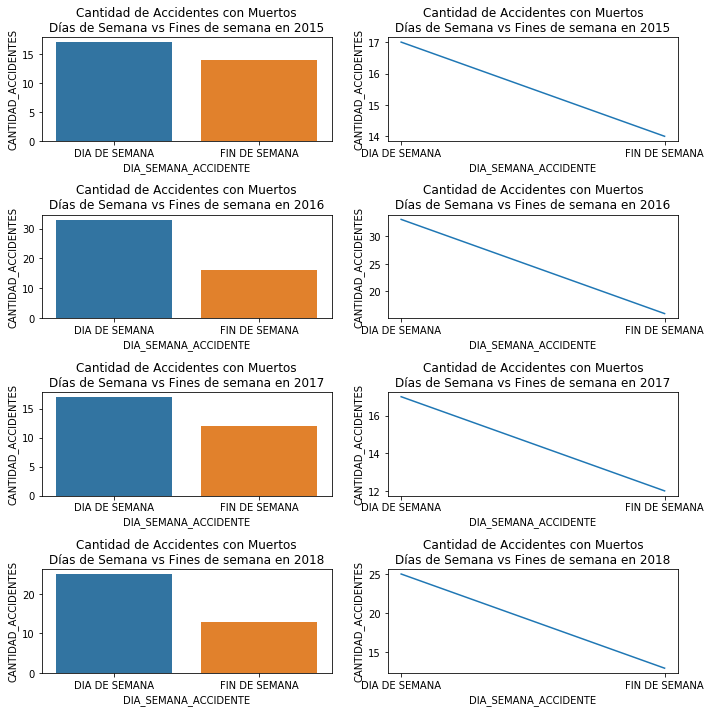

In [31]:
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == 'Con muertos']
years = sorted(accidentes_df['AÑO_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,10), nrows=len(years), ncols=2)
i = 0
for year in years:
    data = (accidentes_df_filter[accidentes_df_filter['AÑO_ACCIDENTE'] == year]
            .groupby('DIA_SEMANA_ACCIDENTE')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes con Muertos\nDías de Semana vs Fines de semana en {0}'.format(year))
    
    sns.lineplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes con Muertos\nDías de Semana vs Fines de semana en {0}'.format(year))
    
    i=i+2
plt.tight_layout()
plt.show()

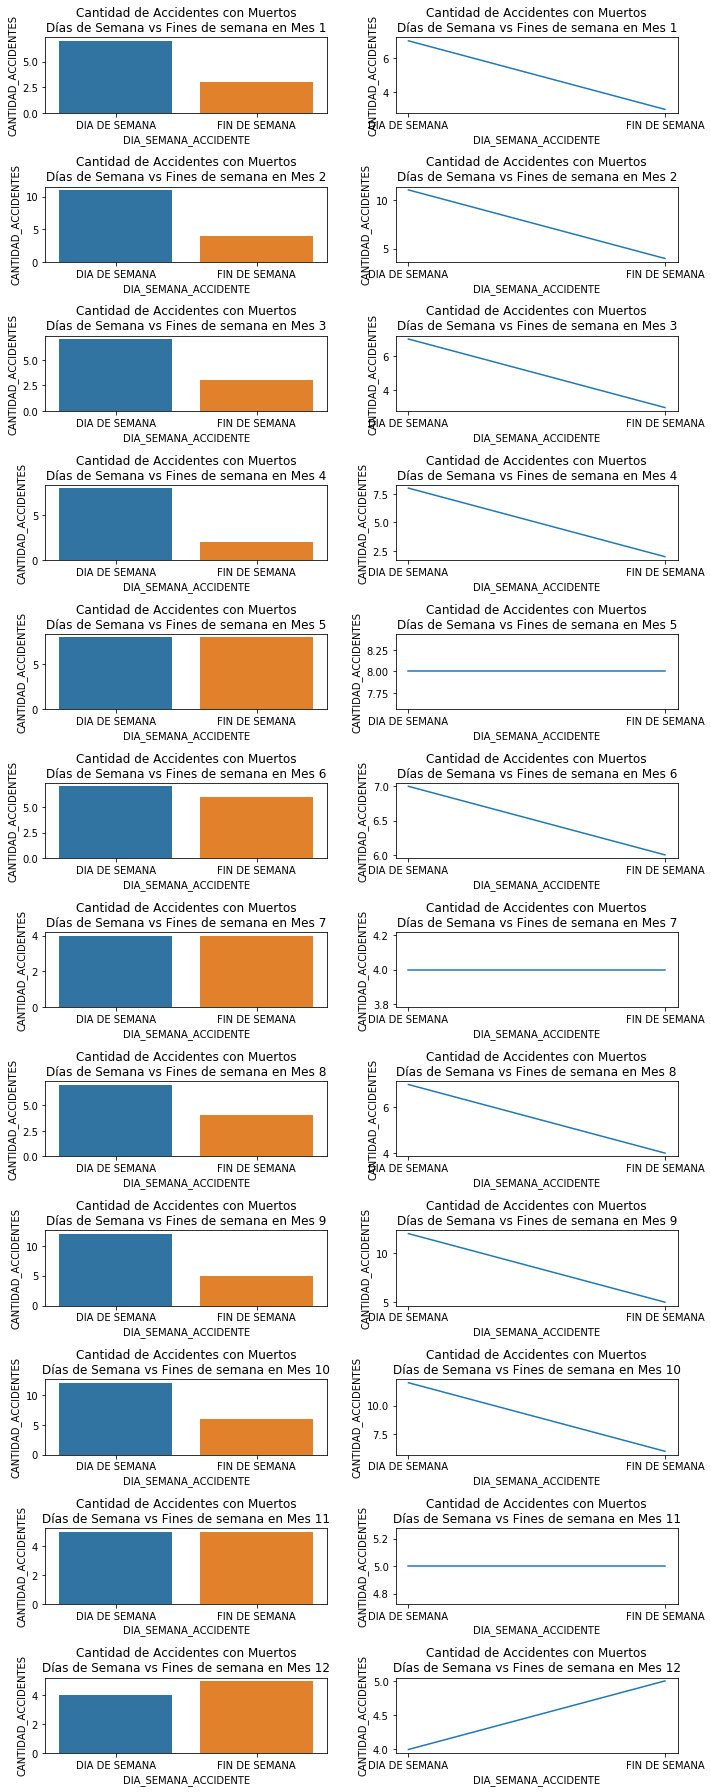

In [32]:
accidentes_df_filter = accidentes_df[accidentes_df['GRAVEDAD_ACCIDENTE'] == 'Con muertos']
months = sorted(accidentes_df['MES_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,25), nrows=len(months), ncols=2)
i = 0
for month in months:
    data = (accidentes_df_filter[accidentes_df_filter['MES_ACCIDENTE'] == month]
            .groupby('DIA_SEMANA_ACCIDENTE')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de Accidentes con Muertos\nDías de Semana vs Fines de semana en Mes {0}'.format(month))
    
    sns.lineplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de Accidentes con Muertos\nDías de Semana vs Fines de semana en Mes {0}'.format(month))
    
    i=i+2
plt.tight_layout()
plt.show()

El patron de accidentes con muertos anualmente muestra la misma tendencia. Sin embargo, mensualmente cambia dado que en meses como Mayo, Julio y Noviembre la cantidad de muertos los fines de semana fue la misma al de los días de semana. También, llama la atención que en Diciembre hay más accidentes con muertos los fines de semana que en los días de semana regular, esta diferencia sin embargo es de tan sólo 1 accidente más y por ende no puede considerarse significativa.

Para los distintos **tipos de accidente** la distribución es la siguiente:

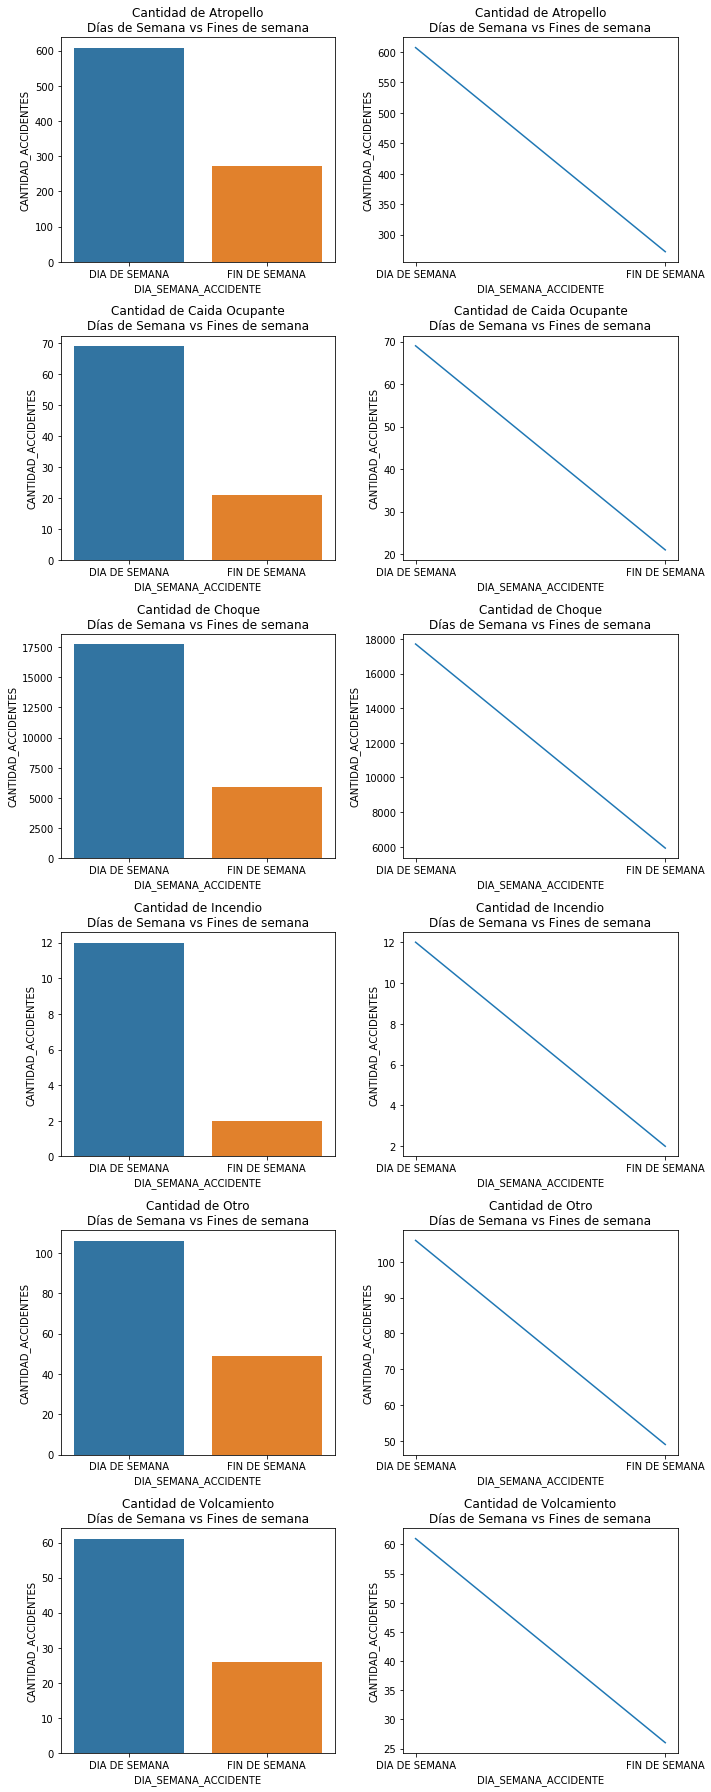

In [33]:
accident_types = sorted(accidentes_df['CLASE_ACCIDENTE'].unique())
fig, axs = plt.subplots(figsize=(10,25), nrows=len(accident_types), ncols=2)
i = 0
for accident_type in accident_types:
    data = (accidentes_df[accidentes_df['CLASE_ACCIDENTE'] == accident_type]
            .groupby('DIA_SEMANA_ACCIDENTE')
            .agg({'CANTIDAD_ACCIDENTES':sum})
            .reset_index())

    sns.barplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i])
    axs.flat[i].set(title='Cantidad de {0}\nDías de Semana vs Fines de semana'.format(accident_type))
    
    sns.lineplot(x='DIA_SEMANA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', data=data, ax=axs.flat[i+1])
    axs.flat[i+1].set(title='Cantidad de {0}\nDías de Semana vs Fines de semana'.format(accident_type))
    
    i=i+2
plt.tight_layout()
plt.show()

A partir de las gráficas no se pudo determinar una clase de accidente específica que presente alteraciones en su frecuencia los fines de semana con respecto a la que presenta los días de semana regulares.